# Statistical Distributions

Distributions has a central importance in statistics as well as in data science. The question is now: Why are the distributions so important? The answer is to have a function describing the likelihood of obtaining the possible values that a random variable can assume. However, depending on the distribution we have, the values of the variable varies.

If we have a known distribution such as normal distribution, it is easy to understand the characteristics of the data and the likelihood of a specific value. So, to make these statistical inferences, it is necessary to know the probability distributions of the data. When we refer to the distribution of a variable, we think of a list, function or graph showing all the values that the data can take and how often they occur. 

In this part, we will study the following distributions:

* Normal (Gaussian) Distribution
* Bernoulli Distribution
* Binomial Distribution
* Uniform Distribution
* Poisson Distribution

## Normal Distribution

Normal distribution is the distribution we hear the most and it is not for no reason. Normally distributed data can be find in many fields such as pyhics and finance. This is not the only reason that distinguish normal distribution from other distributions. Of them,

* It can be easily summarized by only two statistical parameters (mean and standard deviation).
* The area under the curve is 1, which makes it easy to calculate the probability of discrete results within the distribution.
* In general, any variable that measures the outcome of many minor effects is independently close to the normal distribution.
* Many of the common indicators (z-score) and statistical tests (t-tests, Principal Component Analysis) are based on the assumption of normal distribution of data. 



The normal distribution is defined by two parameters: **Mean $(\mu)$** and **standard deviation $(\sigma)$**. The probability density is normally as a function for a distributed variable:

$$\begin{equation}
f(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\sigma^2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}$$

We remember the notation on the left-hand side of the equation from the conditional probability. It reads: 

    Given the mean and standard deviation of the data, the probability density of variable x is given by the formula on the right-hand side of the equation.

Let's generate normally ditributed variable using numpy library and draw the probability density function of normal distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import seaborn as sns
sns.set()

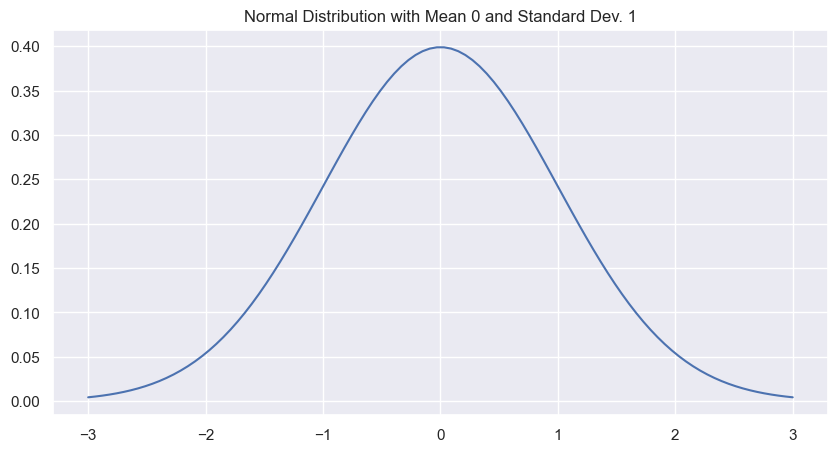

In [2]:
mu=0
sigma = 1
plt.figure(figsize=(10,5))
x = np.linspace(-3, 3, 100)
y = norm.pdf(x, mu, sigma)
plt.plot(x,y)
plt.title('Normal Distribution with Mean 0 and Standard Dev. 1')
plt.show()

Below-given graph represents the probability density function of the variable y, which has standard normal distribution (a special case of normal distribution known as standard normal distribution). But as you know, we can check the distribution using histogram. 

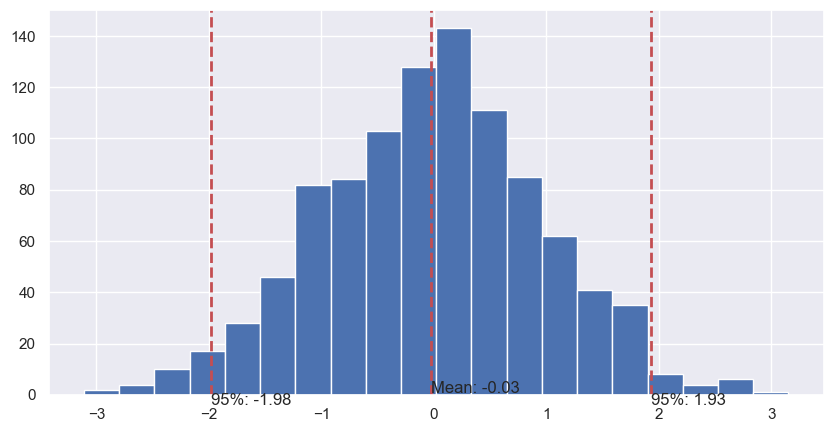

In [3]:
plt.figure(figsize=(10,5))
standart_normal_distribution = norm.rvs(0, 1, size=1000)
min_ylim, max_ylim = plt.ylim()
plt.hist(standart_normal_distribution, bins=20, color = 'b')
plt.axvline(np.mean(standart_normal_distribution), color='r', linestyle='dashed', linewidth=2)
plt.text(np.mean(standart_normal_distribution), max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(standart_normal_distribution)))
plt.axvline(np.mean(standart_normal_distribution) + 2*np.std(standart_normal_distribution), 
            color='r', linestyle='dashed', linewidth=2)
plt.text(np.mean(standart_normal_distribution) + 2*np.std(standart_normal_distribution), 
         max_ylim*0.9, '95%: {:.2f}'.format(np.mean(standart_normal_distribution) + 2*np.std(standart_normal_distribution)),verticalalignment='top')
plt.axvline(np.mean(standart_normal_distribution) - 2*np.std(standart_normal_distribution), 
            color='r', linestyle='dashed', linewidth=2)
plt.text(np.mean(standart_normal_distribution) - 2*np.std(standart_normal_distribution), 
         max_ylim*0.9, '95%: {:.2f}'.format(np.mean(standart_normal_distribution) - 2*np.std(standart_normal_distribution)),verticalalignment='top')
plt.show()

This figure exhibits that if we move 2 standard deviation away from the mean, we either end up with either -2.04 or +2.04, implying that the normal distribution is symmetric.Let's know delve into more the properties of normal distribution.

1. The arithmetic mean, mode, and median are equal. 

2. Normal distribution shows a bell shaped curve. One of the most striking properties of the normal distribution is its shape and perfect symmetry. Fold a picture of a normal distribution exactly in the middle, we will come up with a mirror image of the two equal halves to each other.

3. In normal distributions, the area under the curve between the mean ± any given distance from the mean is a constant rate of standard deviation. For example,  99.73 percent of all cases fall within an average of three standard deviations, 95.45 percent of all cases remain within an average of two standard deviatIons, and 68.27 percent of cases will stay within the limits of one standard deviation from the mean.

Well, how do we know that data follows normal distribution? That is a quite important question. To address this issue, we have mainly two ways:

* Visualization
* Statistics

### Visualization

To detect whether or not data is normally distributed, first visualization tool to be discussed here is histogram. As you know, histogram exhibits the frequency of the data, which is another way of saying that histogram shows the distribution of the data. Let's see how we check the disribution using histrogram.

In [4]:
mean = 0
sd = 1
n = 1000

<Figure size 1000x500 with 0 Axes>

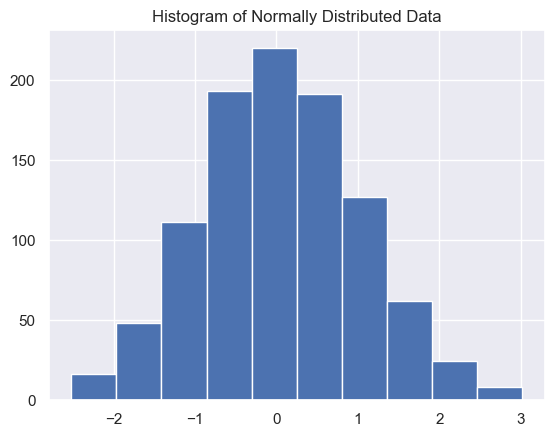

In [6]:
import pandas as pd
plt.figure(figsize=(10,5))
df = pd.DataFrame(norm.rvs(mean, sd, size=n))
df.hist()
plt.title('Histogram of Normally Distributed Data')
plt.show()

Well, does the data follow normal distribution? Looking at the histogram, we can readily observe that the data shows symmetric distribution and most frequent observations gather around mean. What else? Let's check the necessary statistics such as mean and standard deviation to understand the spread of the data.

In [7]:
print('The mean of the data is: {}'.format(df.mean().values))
print('The point locating the 2 standard deviations away from the mean are: {} {}'.format(2*df.std().values,-2*df.std().values))

The mean of the data is: [0.05395519]
The point locating the 2 standard deviations away from the mean are: [1.94866685] [-1.94866685]


All right, as we known that if data is normally distributed nearly 95% of values fall within two standard deviations of the mean. Now, we know that the points that 2 standard deviations away from the mean is +/- 1.93. To make sure, let's confirm this using `np.percentile()`

In [8]:
print('95% of the data corresponds to {} {}'.format(np.percentile(df,2.5),np.percentile(df,97.5)))

95% of the data corresponds to -1.817989129050231 2.0201856636121396


`np.percentile()` compute the q-th percentile of the data along the specified axis. So, once we type `np.percentile(df,2.5)` we obtain the 2.5% of `df` then we do the same thing to the right tail by `np.percentile(df,97.5)`. Generally speaking, we result is so close because we round up the percentage (it was not 95% but 95.45%) and can say that we confirm that 2 standard deviation of the data is in 95%.

However, simply eyeballing the histogram, it is not so scientific to say that "data is normally distributed" because all we observe the symmetric and bell-shape of the data but it may be misleading. 

In [15]:
sample_data= norm.rvs(50,5,1000,)

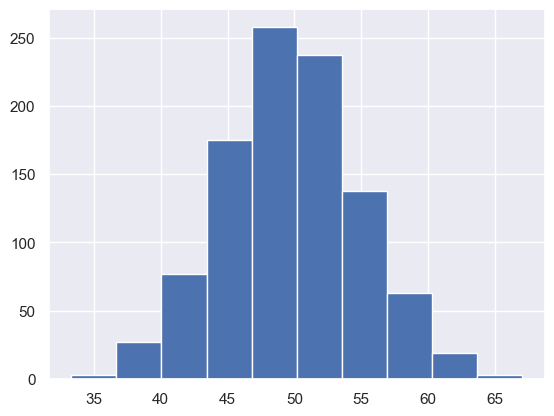

In [16]:
plt.hist(sample_data)
plt.show()

Well, this data also looks symmetric and bell-shaped but can me check it in another way?

The other visualization technique that we use for checking if a data follows a specific distribution is `QQ Plot`.

### QQ Plot

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

We can develop a QQ plot in Python using the qqplot() statsmodels function. The function takes the data sample and by default assumes we are comparing it to a Gaussian distribution. We can draw the standardized line by setting the ‘line‘ argument to ‘s‘.

In [18]:
from statsmodels.graphics.gofplots import qqplot


<Figure size 1000x500 with 0 Axes>

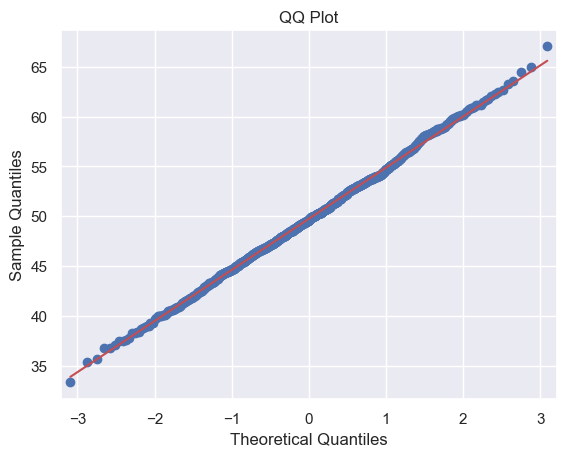

In [23]:
plt.figure(figsize=(10,5))
qqplot(sample_data, line ='s')
plt.title('QQ Plot');
#plt.show();

In [25]:

m = sample_data.mean()
st = sample_data.std()

# Standardize the data
sample_data=(sample_data-m)/st

In [29]:
q = []
j=0
k=len(sample_data)
for i in range(1,k+1,1):
    j=i/k
    q_temp = np.quantile(sample_data, j)
    q.append(q_temp)

In [35]:
np.quantile(sample_data, 1)

3.370332009703183

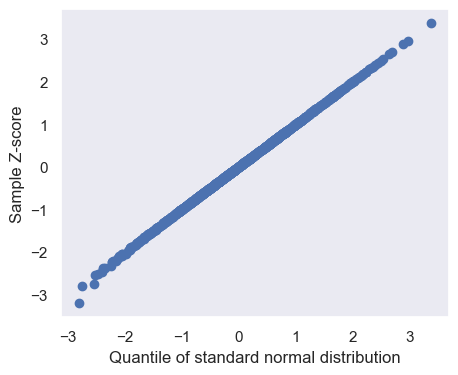

In [32]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.plot(q,sorted(sample_data),'o')
plt.xlabel("Quantile of standard normal distribution")
plt.ylabel("Sample Z-score")
plt.grid()

Well, the blue points moving too closely to the 45 degree line, which is nice because it tells us that our data follows normal distribution.

At this point, we are done with the visualization techniques to check the distribution we have. It is time to discuss the statistical tool for this task. There are many statistical tests for detecting the distribution such as `Shapiro-Wilk Test`, `Anderson-Darling Test`, and `Normality`. We will talk about normality test only because all these more or less generate similar result as long as we do not you have a data with very different characteristics.

Using normality test, we able to draw a conclusion about if a data follows normal distribution or not. Normality test works with hypotheses. The null hypothesis states that the data is normally distributed and the alternative hypothesis states that it is not normally-distributed. We can show the hypotheses in normality test as follows:

$H_0$: Data follow normal distribution

$H_A$: Data does not follow normal distribution

So, based on either t-statistic or p-value we make decision about the normality of the data. Using p-value is easier because it does not require any prior knowledge as t-statistic does. To interpret the test result using t-statistic, we need to know the critical value from the related statistical table.

How do we use p-value in interpreting the test result. It is rather easy. Assume that the confidence interval is 95% and therefore corresponding significance level turns out to be 5%. 

* If the test p-value<0.05, **reject** null hypothesis and conclude the data does not follow normal distribution. 
* If the p-value>0.05, **do not reject** the null hypothesis.

Let's make a practice. As usual, we first import necessary library, which is `scipy` in this case. You remember the data data named `non_normal_data` that we check its normality using histogram. Now, we employ this data in normality test.

In [36]:
from scipy.stats import normaltest
t_stat, p_value = normaltest(sample_data)
print('t-statistics is {:4f}, p-value is {:.4f}'.format(t_stat, p_value))

t-statistics is 0.818065, p-value is 0.6643


So, p-value suggests that we fail to reject the null hypothesis. The bottomline is that histogram is not too reliable tool to understand the distribution.

## Bernoulli Distribution

What happens if we have to model an event with binary outcomes. The answer is `Bernoulli` distribution. The Bernoulli distribution represents two possible consequences of an event. An example immediately comes to our mind is tossing a coin.

Bernoulli distribution can be understood by its distribution. But before proceeding, we need to define two important concepts:

* Probability density function (pdf): This is a function whose value at any given sample can be interpreted as the likelihood that the value of the random variable would equal that sample.

* Probability mass function (pmf): This is a function that gives the probability that a discrete random variable is exactly equal to some value.

So, the difference between pdf and pmf is the data type. If the data is discrete, we use pmf otherwise it is pdf we are talking about.

The Bernoulli distribution is a special case of the Binomial distribution in which a single experiment is carried out with a number of observations of 1, so the Bernoulli distribution describes events with exactly two consequences. Simply put, mathematically, p shows the probability of the event and k shows the results.

Probability mass function for Bernoulli distribution:

$$
f(k|p)=\begin{cases}
p,&\text{if }k=1\\
1-p,&\text{otherwise}\\
\end{cases}$$

The pmf above reads: the event takes the value of k with probability p, otherwise the probability is 1-p. Here where p is the probability of a single success and 1-p is the probability of a single failure.

Let's now generate a Bernoulli distribution with probability of 0.2 (probability of success) and 500 trials. 

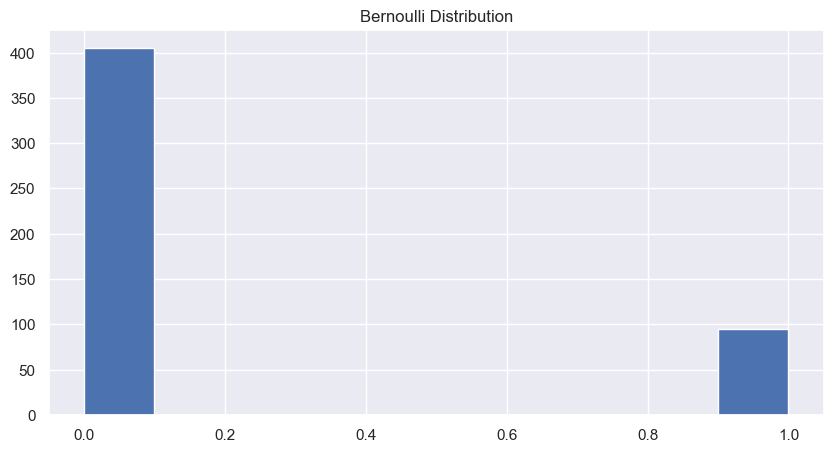

In [39]:
from scipy.stats import bernoulli
plt.figure(figsize=(10,5))
p=0.2
bernoulli= bernoulli.rvs(p, size=500)
plt.hist(bernoulli)
plt.title('Bernoulli Distribution')
plt.show()

We arange the case so as to have a 1 with probability of 0.2 and 0 with probability 0.8. So, it is normal to have 4 times larger observations of 0 outcome compared to 1. Histogram basically tells us that.

### Binomial Distribution

Repeating n times a Bernoulli trial with a probability of success under the same conditions gives us the `binomial` distribution.

The binomial test must fulfill the following conditions:

* Constant sample and the number of trials during the experiment.
* Trials are independent from each other.
* There are two possible outcomes in every attempt (success and failure).
* The event probability of interest in every trial is constant. Therefore, the possibility of undesired events is also unchangeable.

The binomial distribution is a discrete probability distribution.

Binomial distribution and Bernoulli distribution can be mixed. To explain, a Bernoulli random variable has two possible consequences: 0 or 1.

A binomial distribution is the sum of Bernoulli random variables distributed independently and identically. For example, the gain from a coin throw is the Bernoulli random variable. If this experiment is repeated 10 times, the yield is between 0 and 10 dollars. The probability of winning 10 pounds is p*10.

The binomial distribution counts the number of successes of these events when there is a binary event repeated many times (such as many coin flips). p indicates the probability of achieving k successes during the repetition of activity n.



Probability mass function:

$$
f(k|n,p)={n\choose k} p^k(1-p)^{n-k}$$

5 of the 10 pills in a box are aspirin. When 5 tablets are randomly drawn, what is the probability that 3 are aspirin?

$$
p(n=3)=C^{5}_3(0.5)^3(0.5)^2=0.625$$

Let's generate a binomial distribution with n=10, p=0.5, and 1000 trials.

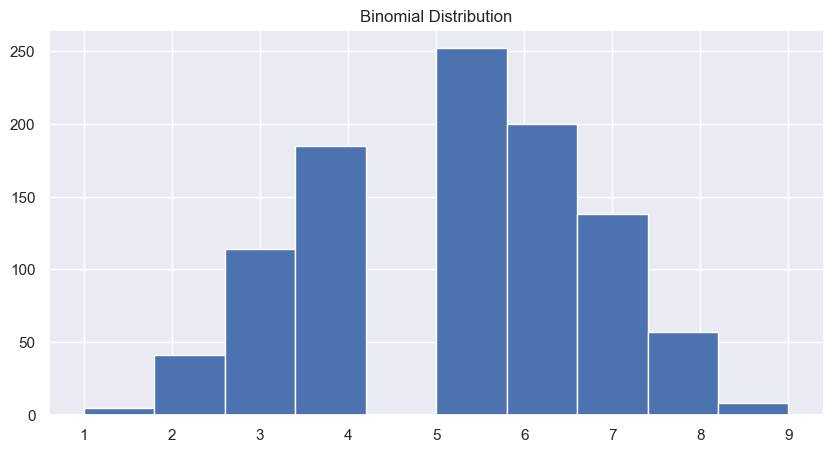

In [41]:
from scipy.stats import binom
plt.figure(figsize=(10,5))
n=10
p=0.5
binomial = binom.rvs(n, p, size=1000) 
plt.hist(binomial)
plt.title('Binomial Distribution')
plt.show()

### Geometric Distribution

In probability theory and statistics, the geometric distribution is either one of two discrete probability distributions:

- The probability distribution of the number X of Bernoulli trials needed to get one success, supported on the set $\{1,2,3,\ldots\}$;
- The probability distribution of the number Y = X − 1 of failures before the first success, supported on the set ${\displaystyle \{0,1,2,\ldots \}}$.

The geometric distribution is a discrete probability distribution.


Probability mass function:

$$
f(k|p)=(1-p)^{k-1}p$$
where p is the probability of a single success and 1-p is the probability of a single failure.

Let's generate a geometric distribution random variables with p=0.5.

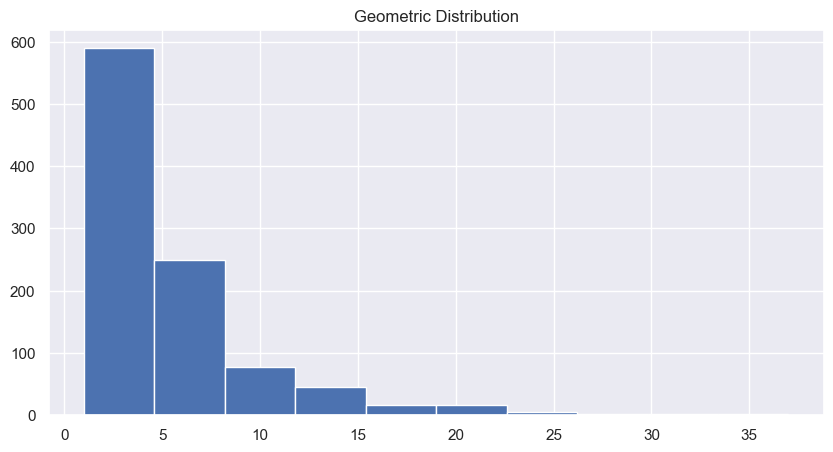

In [47]:
from scipy.stats import geom
plt.figure(figsize=(10,5))
p=0.2
geoms = geom.rvs(p, size=1000) 
plt.hist(geoms)
plt.title('Geometric Distribution')
plt.show()

## Uniform Distribution

One of the simplest distributions used for continuous random variable is the `uniform` distribution.

It is a very useful distribution especially for theoretical statistics with its suitability for mathematical calculations. Another importance of this distribution is that it is very convenient tool to explain various aspects of statistical theory.

If each continuous random variables within a given interval can get the value with equal probability, this random variable has a discrete uniform distribution and the probability density of the uniform distribution is as follows:

$$ f(x)=\frac{1}{b-a},a<x<b$$

So, a uniform distribution is a probability distribution in which each value in a given range is equally likely to occur and that out-of-range values are never likely to occur. As the probability of occurrence of an event at any equal range along the uniform probability density graph is equal, this curve defining the distribution takes the form of a rectangular shape with a constant height over the range and a height of 0 outside the defined range.

Let's observe the shape of the density function of uniform distribution. As we discuss in the definition, any event is equally likely over a defined range in uniform distribution. Outside this range, there is no change to occur. Within this context, we will see what happens if we define the interval to be 20 with 20000 random samples. 

In the standard form, the distribution is uniform on [0, 1]. Using the parameters loc and scale, one obtains the uniform distribution on [loc, loc + scale].

<Figure size 1000x500 with 0 Axes>

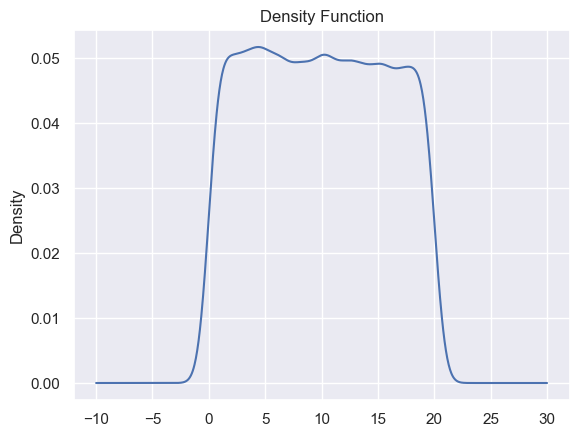

In [42]:
from scipy.stats import uniform
plt.figure(figsize=(10,5))
uniform_data = uniform.rvs(size=20000, loc = 0,scale=20)
df = pd.DataFrame(uniform_data)
df.plot(kind="density", legend=False)
plt.ylabel('Density')
plt.title('Density Function')
plt.show()


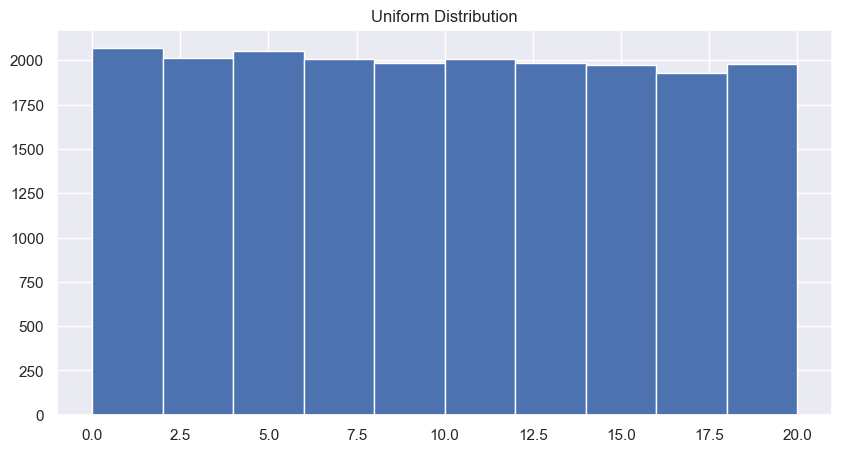

In [43]:
plt.figure(figsize=(10,5))
plt.hist(uniform_data)
plt.title('Uniform Distribution')
plt.show()

## Poisson Distribution

This distribution is used when the probability of occurring within a certain range is very small. That being said, we model discrete cases using Poisson distribution. Technically speaking, the poisson distribution represents the number of times a given event will occur during a given time interval. For example, traffic accidents that occur within a day or natural disasters that occur in a certain year.

The probability mass function is:

\begin{equation}
f(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
\end{equation} 

where $\lambda$ is the rate that events occur during a given time period

As a side note: If the number of observation, n, is large and probability is very small, the binomial distribution approaches the poisson distribution. Generally, the poisson distribution can be used instead of the binomial distribution. 

Let's generate a case in which 5 events occur out of 1000 observations within a given time period.

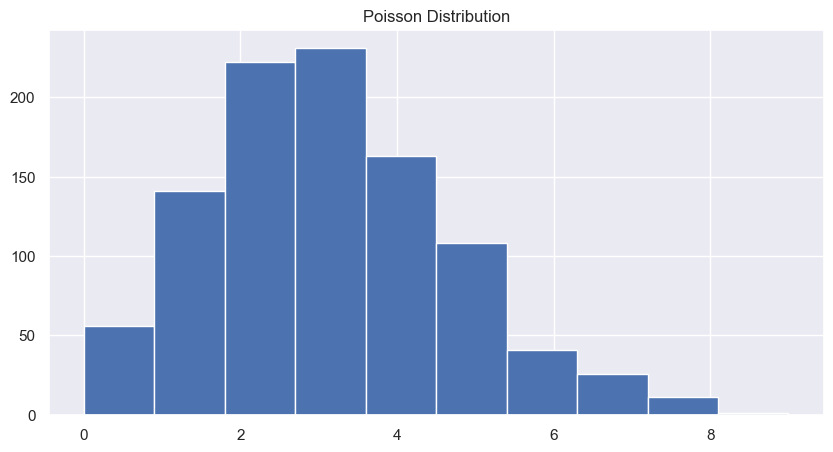

In [44]:
from scipy.stats import poisson
plt.figure(figsize=(10,5))
poisson = poisson.rvs(mu=3, size=1000)
plt.hist(poisson)
plt.title('Poisson Distribution')
plt.show()